In [1]:
import pandas as pd
import numpy as np


In [38]:
df = pd.read_excel('C:/Users/Madhawa Hulangamuwa/Desktop/Data Preocessing/FD Index/FD_index_final.xlsx', index_col='year',parse_dates=False)

In [40]:
print('Shape of Data',df.shape)
df.head()

Shape of Data (33, 4)


,HighIncome,LowIncome,LowerMiddleIncome,UpperMiddleIncome
year,,,,
1987,0.442170,0.103273,0.188252,0.250367
1988,0.437630,0.100825,0.176691,0.267149
1989,0.448215,0.104761,0.172930,0.272981
1990,0.436333,0.109126,0.178302,0.272374
1991,0.430653,0.106722,0.145982,0.235422


<AxesSubplot:xlabel='Year', ylabel='FD Index'>

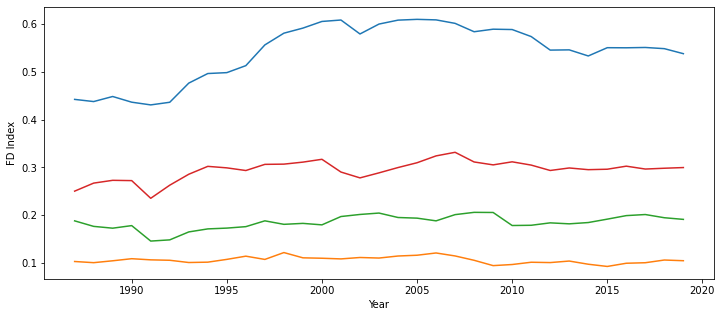

In [41]:
df['HighIncome'].plot(figsize=(12,5),xlabel ='Year',ylabel = 'FD Index')
df['LowIncome'].plot(figsize=(12,5),xlabel ='Year',ylabel = 'FD Index')
df['LowerMiddleIncome'].plot(figsize=(12,5),xlabel ='Year',ylabel = 'FD Index')
df['UpperMiddleIncome'].plot(figsize=(12,5),xlabel ='Year',ylabel = 'FD Index')

In [42]:
from statsmodels.tsa.stattools import adfuller
HighIncome = df["HighIncome"].values
result = adfuller(HighIncome)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary

# p-value: 0.020729 - stationary

ADF Statistic: -3.187339
p-value: 0.020729
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [ ]:
!pip install pmdarima


In [43]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['HighIncome'] , trace=True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-164.184, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-169.030, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-169.975, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-169.732, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-169.961, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-167.983, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-167.982, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-165.976, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-171.499, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-169.521, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-169.875, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-171.099, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-167.508, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.637 seconds


In [44]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  87.750
Date:                Mon, 16 May 2022   AIC                           -171.499
Time:                        19:13:48   BIC                           -168.568
Sample:                             0   HQIC                          -170.528
                                 - 33                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.180      1.777      0.076      -0.033       0.674
sigma2         0.0002    5.3e-05      4.569      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.90   Prob(JB):                         0.43
Heteroskedasticity (H):               0.46   Skew:                             0.52
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima_model import ARIMA 

In [46]:
print(df.shape)
train = df.iloc[:-7]
test = df.iloc[-7:]
print(train.shape,test.shape)

(33, 4)
(26, 4) (7, 4)


In [47]:
model = ARIMA(train['HighIncome'],order=(1,1,0))
model = model.fit()

E:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.wa

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.HighIncome   No. Observations:                   25
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  67.181
Method:                       css-mle   S.D. of innovations              0.016
Date:                Mon, 16 May 2022   AIC                           -128.362
Time:                        19:13:57   BIC                           -124.706
Sample:                             1   HQIC                          -127.348
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0032      0.005      0.632      0.527      -0.007       0.013
ar.L1.D.HighIncome     0.3635      0.198      1.839      0.066      -0.024       0.751
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7509           +0.0000j            2.7509            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start= start,end = end, typ ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

year
2013    0.536963
2014    0.536018
2015    0.537726
2016    0.540398
2017    0.543421
2018    0.546572
2019    0.549769
dtype: float64


E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='year'>

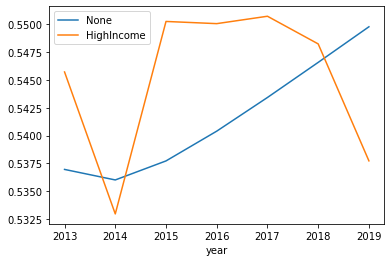

In [50]:
pred.plot(legend=True)
test['HighIncome'].plot(legend=True)

In [51]:
test['HighIncome'].mean()

0.5450937882100506

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['HighIncome']))
print(rmse)

0.008755912062557773


In [53]:
model2 = ARIMA(df['HighIncome'], order = (1,1,0))
model2 = model2.fit()
df.tail()

E:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.wa

,HighIncome,LowIncome,LowerMiddleIncome,UpperMiddleIncome
year,,,,
2015,0.550247,0.092932,0.191808,0.296187
2016,0.550051,0.099609,0.199204,0.302569
2017,0.550715,0.100709,0.201461,0.296551
2018,0.548231,0.106359,0.194771,0.298245
2019,0.537732,0.104907,0.191331,0.299667


32    0.536534
33    0.538092
34    0.540465
35    0.543081
36    0.545768
37    0.548476
Name: ARIMA Prediction, dtype: float64


E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
E:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Year'>

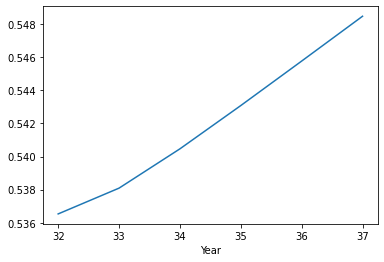

In [57]:
pred = model2.predict(start=len(df), end=len(df)+5,typ='levels').rename('ARIMA Prediction')                                     
print(pred)
pred.plot(xlabel='Year')